# 1. Network thresholding and spanning trees: the case of US air traffic
In this exercise, we will get familiar with different approaches for thresholding networks, and also learn how they can be used for efficiently visualizing networks.

Now, you are given an undirected network describing the US Air Traffic between 14th and 23rd December 2008 (Data from Bureau of Transportation Statistics).
In the network, each node corresponds to an airport and link weights describe the number of flights between the airports during the time period.

The network is given in the file `aggregated_US_air_traffic_network_undir.edg`, and `us_airport_id_info.csv` contains information about names and locations of the airports. The file `US_air_bg.png` contains a map of the US to be used as a background image for visualizations.

This notebook can be used to complete the assignment. It contains a function `plot_network_usa` for visualizing the air transport network. There is no need to modify this function, but do read it through and use it when necessary. You may start your solution after the header "**Begin of the Exercise**" down below. In this exercise, you may also freely use all available `networkx` functions.

Remember to submit your solutions by taking the MyCourses quiz. Please submit also your code through MyCourses.

In [12]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
# NO NEED TO MODIFY THIS FUNCTION
def plot_network_usa(ax, net, xycoords, bg_figname, edges=None, alpha=0.3):
    """
    Plot the network on top of a map of the US.

    Parameters
    ----------
    ax : matplotlib axis object
    net : the network to be plotted
    xycoords : dictionary of node_id to coordinates (x,y)
    bg_figname : file name for the background map figure
    edges : list of node index tuples (node_i,node_j),
            if None all network edges are plotted.
    alpha : float between 0 and 1, describing the level of
            transparency
    """
    img = Image.open(bg_figname)
    axis_extent = (-6674391.856090588, 4922626.076444283,
                   -2028869.260519173, 4658558.416671531)
    ax.imshow(img, extent=axis_extent)
    ax.set_xlim((axis_extent[0], axis_extent[1]))
    ax.set_ylim((axis_extent[2], axis_extent[3]))
    ax.set_axis_off()
    nx.draw_networkx(net,
                     pos=xycoords,
                     with_labels=False,
                     node_color='k',
                     node_size=5,
                     edge_color='r',
                     alpha=alpha,
                     edgelist=edges)
    return ax

## Data
Let us load the data from the right directory. If you run this notebook in your machine, please specify the right directory.

In [9]:
# Select data directory
import os
if os.path.isdir('/coursedata'):
    course_data_dir = '/coursedata'
elif os.path.isdir('../data'):
    course_data_dir = '../data'
else:
    # Specify course_data_dir on your machine
    course_data_dir = r'C:\Users\Utente\Dropbox\PC\Desktop\Aalto\Complex Networks'

print('The data directory is %s' % course_data_dir)

csv_path = os.path.join(course_data_dir, 'US_airport_id_info.csv')
network_path = os.path.join(course_data_dir, 'aggregated_US_air_traffic_network_undir.edg')
bg_figname = os.path.join(course_data_dir, 'US_air_bg.png')

id_data = np.genfromtxt(csv_path, delimiter=',', dtype=None, names=True, encoding='utf8') 
xycoords = {}
for row in id_data:
    xycoords[int(row['id'])] = (row['xcoordviz'], row['ycoordviz'])
net = nx.read_weighted_edgelist(network_path, nodetype=int)

The data directory is C:\Users\Utente\Dropbox\PC\Desktop\Aalto\Complex Networks


### a. Basic properties
Let us first check the basic network properties to get some ideas on what the network is like. **Compute** the following quantities
- Number of nodes $N$, number of links $L$, and density $D$
- Network diameter $d$
- Average clustering coefficient $C$

**Hints**:
- For the clustering coefficient, consider the undirected and unweighted version of the network, where two airports are linked if there is a flight between them in either direction.

- Check MyCourses for instructions on the accuracy of the results. Typically there is no need to report long decimal values with insignificant digits that the code returns.

In [11]:
# Number of nodes (N)
num_nodes = len(net.nodes())

# Number of links (L)
num_links = len(net.edges())

# Density (D)
density = nx.density(net)

# Network diameter (d)
diameter = nx.diameter(net)

# Average clustering coefficient (C)
avg_clustering_coefficient = nx.average_clustering(net, weight=None)

# Print the results
print(f"Number of nodes (N): {num_nodes}")
print(f"Number of links (L): {num_links}")
print(f"Density (D): {round(density,4)}")
print(f"Network diameter (d): {diameter}")
print(f"Average clustering coefficient (C): {round(avg_clustering_coefficient,3)}")


Number of nodes (N): 279
Number of links (L): 2088
Density (D): 0.0538
Network diameter (d): 4
Average clustering coefficient (C): 0.647


### b. Visualization
**Visualize** the full network with all links on top of the map of the US. The resulting figure is somewhat messy due to the large number of visible links.

**Hint**: Use the above `plot_network_usa` function.

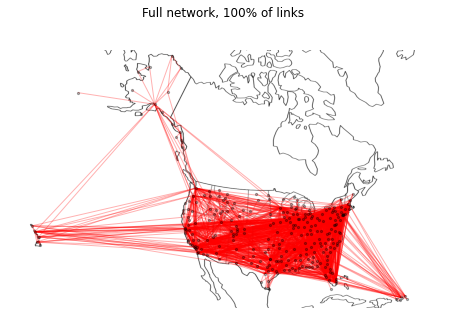

In [5]:
fig_full, ax_full = plt.subplots(figsize=(8, 5))
plot_network_usa(ax_full, net, xycoords, bg_figname, edges=None, alpha=0.3)
fig_full.suptitle('Full network, 100% of links')
plt.show()

### c. Maximal and minimal spanning tree (MST)
In order to reduce the number of plotted links, **compute** both the maximal and minimal spanning tree (MST) of the network and **visualize** them. Then, **answer** following question:
- If you would like to understand the overall organization of the air traffic in the US, would you use the minimal or maximal spanning tree? Why?

**Hint**: For computing minimum spanning trees, use `nx.minimum_spanning_tree`. For computing maximum spanning trees, use `nx.maximum_spanning_tree`.

Number of links in the minimum spanning tree: 278


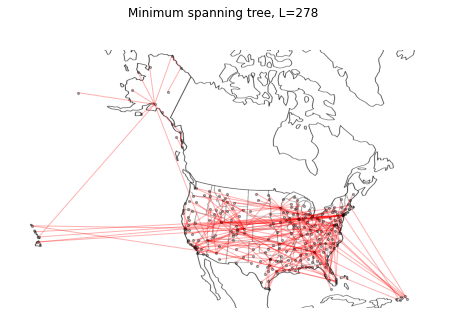

In [6]:
# Compute the minimum spanning tree
min_spanning_tree = nx.minimum_spanning_tree(net)

n_minst = len(min_spanning_tree.edges())
print("Number of links in the minimum spanning tree: {}".format(n_minst))

fig_minst, ax_minst = plt.subplots(figsize=(8, 5))

plot_network_usa(ax_minst, min_spanning_tree, xycoords, bg_figname, edges=None, alpha=0.3)
fig_minst.suptitle('Minimum spanning tree, L={}'.format(n_minst))
plt.show()

Number of links in the maximum spanning tree: 278


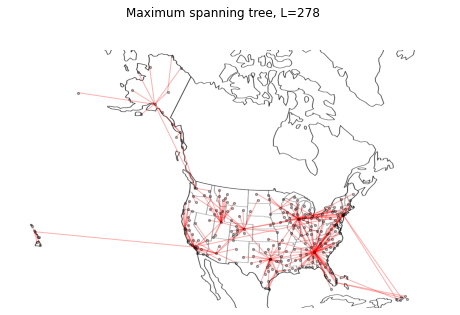

In [7]:
# Compute the maximum spanning tree
max_spanning_tree = nx.maximum_spanning_tree(net)

n_maxst = len(max_spanning_tree.edges())
print("Number of links in the maximum spanning tree: {}".format(n_maxst))

fig_maxst, ax_maxst = plt.subplots(figsize=(8, 5))

plot_network_usa(ax_maxst, max_spanning_tree, xycoords, bg_figname, edges=None, alpha=0.3)
fig_maxst.suptitle('Maximum spanning tree, L={}'.format(n_maxst))
plt.show()

### d. Thresholded networks
**Threshold** and **visualize** the network by taking only the strongest $M$ links into account, where $M = N - 1$ is the number of links in the maximal spanning tree. Then, **answer** following questions:
- How many links does the thresholded network share with the maximal spanning tree?
- Given this number and the visualizations, does simple thresholding yield a similar network as the maximum spanning tree?

**Hint**: Note that the network is undirected, which means that edge $(i, j)$ is the same as edge $(j, i)$. When comparing the set of edges, however, the order of the nodes in the edge tuple matters. Make sure that each edge is represented in a consistent order across the two networks when comparing them.

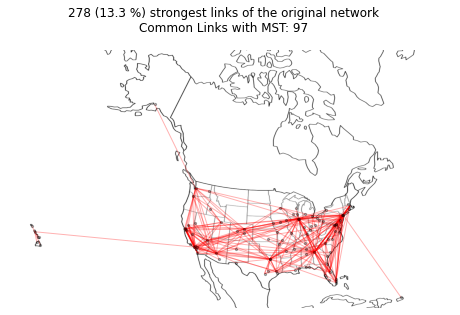

In [8]:
# Calculate M, which is the number of links in the maximum spanning tree
M = n_maxst

# Sort the edges of the original network by weight in descending order
sorted_edges = sorted(net.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)

# Take the top M edges to create the thresholded network
thresholded_edges = sorted_edges[:M]

# Create a new graph for the thresholded network
thresholded_net = nx.Graph()
thresholded_net.add_edges_from(thresholded_edges)

# Create a figure and axis for the thresholded network
fig_thr, ax_thr = plt.subplots(figsize=(8, 5))

# Call the plot_network_usa function to plot the thresholded network on the map
plot_network_usa(ax_thr, thresholded_net, xycoords, bg_figname, edges=None, alpha=0.3)

# Calculate the number of common links between the thresholded network and the maximum spanning tree
common_links = len(set(thresholded_net.edges()) & set(max_spanning_tree.edges()))

maxst_edges = max_spanning_tree.edges(data=True)
common_edges = [(e[0],e[1]) for e in thresholded_edges if e in maxst_edges]


#erratoooooooooooooo
# Set the title for the plot
fig_thr.suptitle('{} ({:.1f} %) strongest links of the original network\n'
                 'Common Links with MST: {}'.format(M, (M * 100.0) / num_links, len(common_edges)))

# Show the plot
plt.show()


# 2. Network sampling

In [19]:
rng = np.random.default_rng()
import random

### Introduction
Many network data sets are samples of some underlying graphs that we are actually interested in. That is, nodes and edges of these empirical networks have been sampled in a way that we only observe parts of the network. This can severely bias even the most simple network measures so that the sampled graph has quantitatively different properties when compared to the underlying graph.
In this exercise we will see the effect of three different sampling schemes on network transitivity $C$ (also known as the global clustering coefficient) and derive estimators that can be used to correct for these biases.  

Let us first recall the definition of transitivity $C$:
$$
C =\frac{\tau_{\triangle}}{\tau_{\angle}} = \frac{\sum_i E_i}{\sum_i {k_i \choose 2}}\,, %=\frac{\text{3} \times \text{number of triangles in the network}}{\text{number of two-stars in the network}}\,,
$$
where $\tau_{\triangle}$ is three times the nuber of triangles (three nodes that are fully connected), 
$\tau_{\angle}$ is the number of two-stars (a node and two of its neighbors, regardless of whether they are triangles), 
$i$ is a node, $k_i$ is the degree of $i$, and $E_i$ is the number of triangles centered on $i$ (in other words, how many triangles pass by $i$).
Note that $\tau_{\triangle}$ is three times the number of triangles because we are going through all the nodes - and thus counting each triangle three times. We could define an alternative estimator that corrects for this overestimation, but for transitivity $\tau_{\triangle} = \sum_i E_i$ suffices.

### Beginning of the exercise
Start by generating a network from a random model. Use the command `nx.relaxed_caveman_graph` to generate a graph with 55 communities of 12 people each, where each link is then rewired with probability $0.1$. This is the "true" underlying graph from which we obtain samples.

In [13]:
# Define the parameters
num_communities = 55
community_size = 12
rewire_prob = 0.1

# Generate the relaxed caveman graph
g = nx.relaxed_caveman_graph(num_communities, community_size, rewire_prob)

# Verify the number of nodes and edges
num_nodes = len(g.nodes())
num_edges = len(g.edges())

print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")


Number of nodes: 660
Number of edges: 3630


Let us first visualize the network to have a rough idea about its structure. (This visualization is not part of the exercise; you don't need to submit it and it won' be graded.)

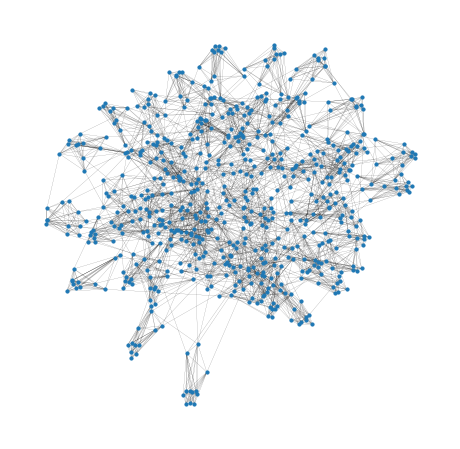

In [42]:
fig_viz, ax_viz = plt.subplots(figsize=(8, 8))
nx.draw(g, ax=ax_viz, node_size=10, width=.1)

### a. Three sampling schemes
First, let's implement the three sampling schemes. **Program** three functions that perform:
1. Bernoulli sampling of nodes: iterate over nodes, and sample each one with probability $p$. We observe an edge if and only if we have sampled its two constituting nodes. 
2. Bernoulli sampling of edges: iterate over edges, and sample each one with probability $p$. We observe a node if and only if we have sampled at least one of its edges.
3. Star sampling: iterate over nodes, and sample each one with probability $p$. If you have directly sampled a node, you also observe all of its neighbors (a real-life example would be a data set obtained by crawling through friendship lists of randomly selected users in a social networking website). Note: here we will have nodes that are sampled a) directly with probability $p$ and b) indirectly via sampling a neighbor. It is useful to keep a list of nodes you sampled directly. 


In [14]:
def sample_nodes(g, p):
    """
    Sample a graph via Bernoulli node sampling.
    For each node in g, sample it with probability p, and add edge (i, j) only if both nodes i and j have been sampled.

    Parameters
    ----------------
    g: a networkx graph object
    p: sampling probability for each node
    """

    # Initialize empty network
    g_new = nx.empty_graph()
    nodes = []
    for u in g.nodes():
        if random.random() < p:
            nodes.append(u)
    edges = [(u,v) for (u,v) in g.edges() if u in nodes and v in nodes]
    g_new.add_edges_from(edges);
    
    return g_new

In [15]:
def sample_edges(g, p):
    """
    Sample a graph via Bernoulli edge sampling.
    For each edge in g, sample it with probability p

    Parameters
    ----------------
    g: a networkx graph object
    p: sampling probability for each edge
    """

    # Initialize empty network
    g_new = nx.empty_graph()
    edges = []
    for e in g.edges():
        if random.random() < p:
            edges.append(e)
    g_new.add_edges_from(edges);
    
    return g_new

**Hint**: For star sampling, there are at least two ways of counting the sampled two-stars: we can either focus on the directly sampled nodes and obtain their full degrees, or we can count all the two-stars regardless of whether the center node itself was selected (so if two nodes with the same neighbor are selected, we observe a two-star centered on a node not directly sampled). Both answers are correct, but using the directly-sampled nodes will make calculations easier on the next excercise.

In [16]:
def sample_stars(g, p):
    
    """
    Sample a graph via star sampling.
    We sample nodes with probability p, and observe all neighbors. 
    Returns a g_new network obtained via star sampling, and also 
    a list of the nodes that were directly sampled from g, not only 
    sampled via observing a sampled neighbor.
    Parameters
    ----------------
    g: a networkx graph object
    p: sampling probability of sampling a node (and observing its neighbors)
    """

    # Initialize empty network
    g_new = nx.empty_graph()
    direct_nodes = []
    for u in g.nodes():
        if random.random() < p:
            direct_nodes.append(u)
            
    edges = [(u,v) for (u,v) in g.edges() if u in direct_nodes and v in direct_nodes]
    
    for u in direct_nodes:
        neighbors = set(g.neighbors(u))
        for v in neighbors:
            if (u,v) in g.edges() and (u,v) not in edges:
                edges.append((u,v))
            elif (v,u) in g.edges() and (v,u) not in edges:
                edges.append((v,u))
    
    g_new.add_edges_from(edges)
    return g_new, direct_nodes

**Obtain samples** of the network using the three sampling schemes with probability $p = 0.28$. Then, use either the code we provided or your own to obtain empirical estimates of the number of triangles, the number of two-stars, and transitivity. **Report** your results on a table where the columns represent:
- sampled number of triangles, 
- sampled number of two-stars
- transitivity in sampled network
- fraction of sampled triangles over triangles in original network
- fraction of sampled two-stars over two-stars in original network

and the rows represent the different sampling schemes (plus an extra row with the values of the original network). **Answer** the following questions: 
- How do sampling schemes compare in the fraction of triangles/two-stars they preseve? 
- Do sampling schemes affect two-stars/triangles in the same way? 
- Transitivity via node sampling should be similar to the real value, what could be the reason for this? 

In [17]:
def count_twostars(g, nodes=None):
    """
    Counts the number of two stars in a graph

    Parameters
    ------------------
    g: a networkx graph object
    nodes: if nodes is not None, a list of sampled nodes under the star-sampling scheme.
    """
    if not nodes:
        two_stars = [k*(k - 1)/2 for n, k in g.degree()]
    else:
        two_stars = [k*(k - 1)/2 for n, k in g.degree() if n in nodes]
    n_two_stars = sum(two_stars)
    return int(n_two_stars)


def count_triangles(g):
    """
    Counts the number of triangles in a graph

    Parameters
    ------------------
    g: a networkx graph object
    """
    triangles = []
    for node in g.nodes:
        neighbors = [n for n in g.neighbors(node)]
        n_neighbors = len(neighbors)
        n_links = 0
        if n_neighbors > 1:
            for n1 in neighbors:
                for n2 in neighbors:
                    if g.has_edge(n1, n2):
                        n_links += 1
        triangles.append(n_links/2)
    n_triangles = sum(triangles)
    # Another option is to use nx.triangles(), or to count triangles directly

    return int(n_triangles)


def transitivity(n_triangles, n_twostars):
    """
    Returns the plug-in estimator for global transitivity given the number of triangles and number of two-stars.

    Parameters
    ---------------------
    triples: int
    triangles: int
    """
    transitivity = n_triangles/n_twostars

    return transitivity

In [29]:
# a)

# Compute statistics from the original network
n_triangles_orig = count_triangles(g)
n_twostars_orig = count_twostars(g)
transit_orig = transitivity(n_triangles_orig, n_twostars_orig)
p = 0.28

print('samp. |  triangles | two-stars | transit. | triang.frac. | two-st.frac. ')



# Sample nodes
g_new = sample_nodes(g, p)

# Obtain node statistics
n_triangles = count_triangles(g_new)
n_twostars = count_twostars(g_new)
transit = transitivity(n_triangles, n_twostars)
f_triangles_n = n_triangles / n_triangles_orig
f_twostars_n = n_twostars / n_twostars_orig
print('node  |  %8d  |  %7d  |  %1.4f  |    %1.4f    |    %1.4f    ' %
      (n_triangles, n_twostars, transit, f_triangles_n, f_twostars_n))




# Sample edges
g_new = sample_edges(g, p)

# Obtain edge statistics
n_triangles = count_triangles(g_new)
n_twostars = count_twostars(g_new)
transit = transitivity(n_triangles, n_twostars)
f_triangles_e = n_triangles / n_triangles_orig
f_twostars_e = n_twostars / n_twostars_orig
print('edge  |  %8d  |  %7d  |  %1.4f  |    %1.4f    |    %1.4f    ' % 
      (n_triangles, n_twostars, transit, f_triangles_e, f_twostars_e))





# Sample stars
g_new, nodes = sample_stars(g, p)

# Obtain star statistics
n_triangles = count_triangles(g_new)
n_twostars = count_twostars(g_new, nodes)
transit = transitivity(n_triangles, n_twostars)
f_triangles_s = n_triangles / n_triangles_orig
f_twostars_s = n_twostars / n_twostars_orig
print('star  |  %8d  |  %7d  |  %1.4f  |    %1.4f    |    %1.4f    ' % 
      (n_triangles, n_twostars, transit, f_triangles_s, f_twostars_s))
print('orig. |  %8d  |  %7d  |  %1.4f  |    %1.4f    |    %1.4f    ' % 
      (n_triangles_orig, n_twostars_orig, transit_orig, 1., 1.))

samp. |  triangles | two-stars | transit. | triang.frac. | two-st.frac. 
node  |       387  |      538  |  0.7193  |    0.0150    |    0.0147    
edge  |       630  |     3055  |  0.2062  |    0.0244    |    0.0832    
star  |      5190  |    10416  |  0.4983  |    0.2012    |    0.2838    
orig. |     25800  |    36697  |  0.7031  |    1.0000    |    1.0000    


### b. Sampling probabilities of Bernoulli sampling (pen-and-paper)

See the exercise sheet for details.

### c. Deriving HT estimators (challenge exercise; pen-and-paper)

The Horvitz-Thompson (HT) estimator is a simple way of correcting for the bias induced by sampling. Let $\hat{\tau}$ be the emprical count of a structure found in a sampled network, such as your results from a). If $p_{\tau}$ is the probability of observing these structures, then the HT estimator for the total counts is simply:
\begin{equation}
\hat{\tau}^{HT} = \frac{1}{p_{\tau}} \hat{\tau}
\end{equation}
For transitivity, we may simply use a "plug-in" estimator by substituting the empirical estimators for the HT estimators; that is, use $\hat{\tau}^{HT}_{\triangle}$ and $\hat{\tau}^{HT}_{\angle}$ instead of $\hat{\tau}_{\triangle}$ and $\hat{\tau}_{\angle}$ in the transitivity formula.

Explain why the HT estimator corrects the sampling bias and derive the HT estimators for the number of two-starts, triangles, and transitivity. For further details, see the exercise sheet.

### d. Implementing HT estimators (challenge exercise)
**Implement** the HT estimator for the three sampling schemes. Given two selection probabilities $p$, we will sample at least $n=150$ times to obtain distributions of some of our HT estimators, and compare it with the measurements from the sampled networks. In other words, for each $p=0.35, 0.5$, and for each sampling scheme, obtain $n=150$ samples from the original network, **calculate** the HT estimator for the number triangles and for transitivity. For $p=0.5$ include also the empirical estimator (the counts without the HT correction), and for all plots include a vertical line depicticing the value of the original network. As a summary, you will **report your results in six plots**:

- Histograms of estimator $\hat{\tau}_{\triangle}^{HT,n}$ for $p=0.35,  0.5$ and $\hat{\tau}_{\triangle}$ (empirical counts) for $p=0.5$ and true value of $\tau_{\triangle}$.
- Histograms of estimator $\hat{\tau}_{C}^{HT,n}$ for $p=0.35, 0.5$ and $\hat{\tau}_{C}$ (empirical value) for $p=0.5$ and true value of $C$.
- Histograms of estimator $\hat{\tau}_{\triangle}^{HT,e}$ for $p=0.35, 0.5$ and $\hat{\tau}_{\triangle}$ (empirical counts) for $p=0.5$ and true value of $\tau_{\triangle}$.
- Histograms of estimator $\hat{\tau}_{C}^{HT,e}$ for $p=0.35, 0.5$ and $\hat{\tau}_{C}$ (empirical value) for $p=0.5$ and true value of $C$.
- Histograms of estimator $\hat{\tau}_{\triangle}^{HT,s}$ for $p=0.35, 0.5$ and $\hat{\tau}_{\triangle}$ (empirical counts) for $p=0.5$ and true value of $\tau_{\triangle}$.
- Histograms of estimator $\hat{\tau}_{C}^{HT,s}$ for $p=0.35, 0.5$ and $\hat{\tau}^{C}$ (empirical value) for $p=0.5$ and true value of $C$.

In your plots, the distribution of HT estimators should lie around the real value. **Answer** the following questions: 
- What is the effect of the sampling probability $p$ on your estimators? 
- How the HT distribuitions differ between sampling schemes? 
- In the last plot, the empirical estimators (without HT correction) should be centered around the true value, why could this be?

**Hints**:
- Since we want to observe how different samples may arise from the same network, we need to take a large number of samples ($n=150$, for instance). However, while you are coding and testing it may be wise to use a smaller $n$. Keep in mind that if your code takes too much time to run on your computer, you can report results for a smaller $n$ or a smaller network.
- In case you were not able to obtain the theoretical probabilitites in excercise b), you can substitute the theoretical probabilities ($p^s_{\triangle}$, for example) with the fraction of sampled structures over the totals in the original network. If this is the case, please state so in your report and explain why this substitution is possible.  


In [29]:
def ht_node_probabilities(p):
    """
    Given the probability of sampling a node, returns the probabilities of sampling two-stars and triangles

    Parameters
    ---------------------
    p: float
    """
    # NOTE: if you did not obtain the theoretical values, you can use 
    # an estimate of pi_twostars and pi_triangles by sampling nodes 
    # with probability p=.35, .5, and using the fraction of sampled 
    # twostars/triangles as estimates.
    
    pi_twostars = p**3
    pi_triangles = p**3
    
    return pi_twostars, pi_triangles

In [30]:
def ht_edge_probabilities(p):
    """
    Given the probability of sampling an edge, returns the probabilities of sampling two-stars and triangles

    Parameters
    ---------------------
    p: float
    """
    pi_twostars = p**2
    pi_triangles = p**3

    return pi_twostars, pi_triangles

In [28]:
def ht_star_probabilities(p):
    """
    Given the probability of sampling a star, returns the probabilities of sampling two-stars and triangles

    Parameters
    ---------------------
    p: float
    """
    # NOTE: if you did not obtain the theoretical values, you can use 
    # an estimate of pi_twostars and pi_triangles by sampling stars 
    # with probability p=.35, .5, and using the fraction of sampled 
    # twostars/triangles as estimates.
    
    pi_twostars = p
    pi_triangles = 3*(p**2)*(1-p)+(p**3)
    
    return pi_twostars, pi_triangles

In [23]:
def horvitz_thompson(obs_values, p):
    """
    Returns the Horvitz-Thompson Estimator

    Parameters
    --------------------
    obs_values: int or float, observed values from a sampled network
    p: float, probability of obs_values
    """
    ht = (1 / p) * obs_values

    return ht

In [31]:
def ht_estimators(g, p, n_samp, sampling_type, empirical=False):
    """
    Function for obtaining n_samp samples from a network g and returning the HT estimates, given a sampling type and sampling probabilty p.
    Returns two lists of size n_samp, where each list contains HT estimates for transitivity and number of two-stars.

    Parameters
    ------------------------
    g: a networkx network
    p: float, sampling probability
    n_samp: int, number of samples to obtain
    sampling_type: str, either 'nodes', 'edges' or 'stars'
    empirical: bool, if True, then do not use HT estimators
    """
    transitivity_estimates = []
    triangles_estimates = []

    for i in range(n_samp):
        
        if sampling_type == 'nodes':
            g_new = sample_nodes(g, p)
            nodes = None
            pi_twostars, pi_triangles = ht_node_probabilities(p)

        elif sampling_type == 'edges':
            g_new = sample_edges(g, p)
            nodes = None
            pi_twostars, pi_triangles = ht_edge_probabilities(p)

        elif sampling_type == 'stars':
            g_new, nodes = sample_stars(g, p)
            pi_twostars, pi_triangles = ht_star_probabilities(p)
        else:
            raise ValueError("Invalid sampling_type, must be either 'nodes', 'edges' or 'stars'")
        #TODO: Count the statistics, build the HT estimators, plug-in for transitivity and save sampled value
        #TODO: if empirical = True, simply do not use HT estimators
        
        n_triangles = count_triangles(g_new)
        n_twostars = count_twostars(g_new, nodes)
        transit = transitivity(n_triangles, n_twostars)

        if empirical:
            triangle_ht = n_triangles
            stars_ht = n_twostars
            transit_ht = transit
        
        else:
            triangle_ht = n_triangles/pi_triangles
            stars_ht = n_twostars/pi_twostars
            transit_ht = transitivity(triangle_ht, stars_ht)

        transitivity_estimates.append(transit_ht)
        triangles_estimates.append(triangle_ht)

    return transitivity_estimates, triangles_estimates

In [34]:
def plot_triangle_transitivity_histograms(n_samp, sampling_type, g, p_empirical=.5):
    """
    Plot exercise histograms for n_samp samples and a given sampling_type (nodes, edges or stars).
    Calls function ht_estimators for probabilites p=.2, .5, obtaining n_samp samples for each case. 
    Plots the HT estimators for number of triangles and transitivity, and the empirical estimators p=.5, as well 
    as the true values for transitivity and 
    
    Paramters:
    ------------------------
    n_samp: int, number of samples
    sampling_type: str, either 'nodes', 'edges' or 'stars'
    g: networkx graph
    p_empirical: float, probability value for which to obtain empirical estimators (without HR correction). 
    """

    fig = plt.figure(figsize=(8, 5))
    probabilities = [ .35, .5]

    estimator_name_triangles = r'$\hat{\tau}^' + sampling_type[0] + r'_{\bigtriangleup}$'
    ax1 = fig.add_subplot(2, 1, 1)
    ax1.set_title('Estimators for triangles sampling {}, '.format(sampling_type) + estimator_name_triangles)
    ax1.set_xlabel(estimator_name_triangles)

    estimator_name_transit = r'$\hat{\tau}^' + sampling_type[0] + r'_C$'
    ax2 = fig.add_subplot(2, 1, 2)
    ax2.set_title('Estimators for transitivity sampling {}, '.format(sampling_type) + estimator_name_transit)
    ax2.set_xlabel(estimator_name_transit)

    #Plot HT estimates for different probabilities
    for p in probabilities:
        transit_est, triangles_est = ht_estimators(g, p, n_samp, sampling_type)
        ax1.hist(triangles_est, 30, alpha=.5, density=True, label='p = {}'.format(p))
        ax2.hist(transit_est, 30, alpha=.5, density=True, label='p = {}'.format(p))

    #Obtain empirical estimates
    transit_est, triangles_est = ht_estimators(g, p_empirical, n_samp, sampling_type, empirical=True)
    ax1.hist(triangles_est, 30, alpha=.5, density=True, label='p_empirical = {}'.format(p_empirical))
    ax2.hist(transit_est, 30, alpha=.5, density=True, label='p_empirical = {}'.format(p_empirical))

    # Plot real values
    n_triangles_orig = count_triangles(g)
    n_twostars_orig = count_twostars(g)
    transit_orig = transitivity(n_triangles_orig, n_twostars_orig)
    ax1.axvline(n_triangles_orig, color='r') # n_triangles as obtained for the full network
    ax2.axvline(transit_orig, color='r') # transit as obtained for the full network

    ax1.legend(loc=0)
    ax2.legend(loc=0)
    fig.tight_layout()
    fig.savefig('ht_estimator_sampling_{}.pdf'.format(sampling_type))

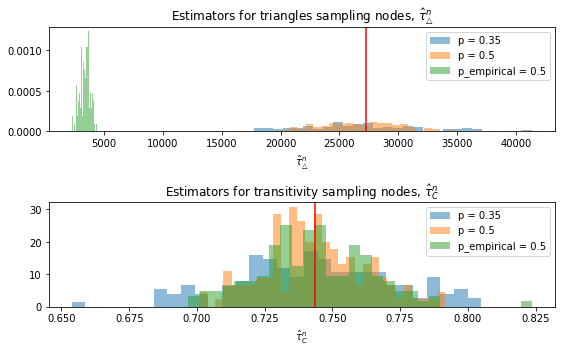

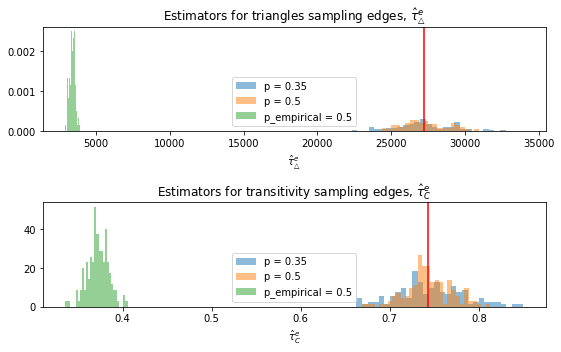

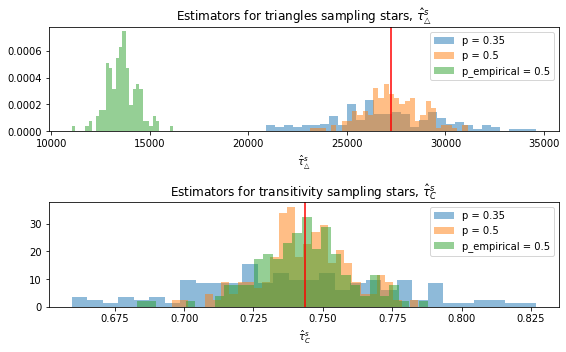

In [35]:
n_samp = 150
# d)# Histograms for node sampling
plot_triangle_transitivity_histograms(n_samp, 'nodes', g, p_empirical=.5)

# Histograms for edge sampling
plot_triangle_transitivity_histograms(n_samp, 'edges', g, p_empirical=.5)

# Histograms for star sampling
plot_triangle_transitivity_histograms(n_samp, 'stars', g, p_empirical=.5)

# Tresholding of similarity networks

In [44]:
import pickle
import numpy as np
import networkx as nx
import matplotlib.pylab as plt
import pandas as pd

Similarity networks are weighted networks where each node is associated with a time series and link weights represent the temporal similarity (typically Pearson correlation coefficient) between these time series. Similarity networks are used commonly in the study of e.g. financial systems, brain function, and climate. Before further analysing the network, one needs to threshold it, that is, to decide which correlations are strong enough to be considered as network links. In this exercise, we'll construct a similarity network from neuroimaging data and explore how thresholding the network affects some of its properties.

The data used in this exercise is functional magnetic resonance imaging (fMRI) data from the ABIDE II database (http://fcon_1000.projects.nitrc.org/indi/abide/abide_II.html; Di Martino et al. 2017, Scientific data 4(1)). fMRI is an indirect measure of brain activity: it measures the blood oxygen level in the brain. The pickle file `roi_time_series.pkl`, available at `/coursedata`, contains the fMRI time series of 246 brain areas (known as Regions of Interest or ROIs) from the Brainnetome parcellation (Fan et al. 2016, Cerebral Cortex 26(8)).

The ABIDE II data collection was funded by National Institute of Mental Health (NIMH 5R21MH107045 and NIMH 5R21MH107045) and by gifts from Joseph P. Healey, Phyllis Green and Randolph Cowen to the Child Mind Institute.

Remember to submit your solutions by taking the MyCourses quiz. Please submit also your code through MyCourses.

In [56]:
# Select data directory
import os
if os.path.isdir('/coursedata'):
    course_data_dir = '/coursedata'
elif os.path.isdir('../data'):
    course_data_dir = '../data'
else:
    # Specify course_data_dir on your machine
    course_data_dir = r"C:\Users\Utente\Dropbox\PC\Desktop\Aalto\Complex Networks"

print('The data directory is %s' % course_data_dir)

roi_time_series_fname = os.path.join(course_data_dir, "roi_time_series.pkl")


The data directory is C:\Users\Utente\Dropbox\PC\Desktop\Aalto\Complex Networks


## Visualization

You can use the following code for visualizing the adjacency matrices without any modifications.

In [42]:
# NO NEED TO MODIFY THIS CELL
def visualize_adjacency_matrix(A, density):
    """
    Visualizes the given adjacency matrix and saves it as a pdf file.
    
    Parameters:
    -----------
    A: np.array, adjacency matrix
    density: int or float, used for the title of the visualization
    save_path: str, path to which save the visualization
    """
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.imshow(A)
    ax.set_title("Adjacency matrix at density {}".format(density))
    plt.imshow(A)
    plt.axis('off')
    #fig.savefig(save_path)

### a) Full adjacency matrix

**Download** the data, **construct** the full adjacency matrix by calculating the Pearson correlation coefficient between each pair of time series, and **visualize** it with `plt.imshow()` using the `visualize_adjancency_matrix()` function above.

In [90]:
with open(roi_time_series_fname, 'rb') as f:
    roi_time_series_data = pickle.load(f)

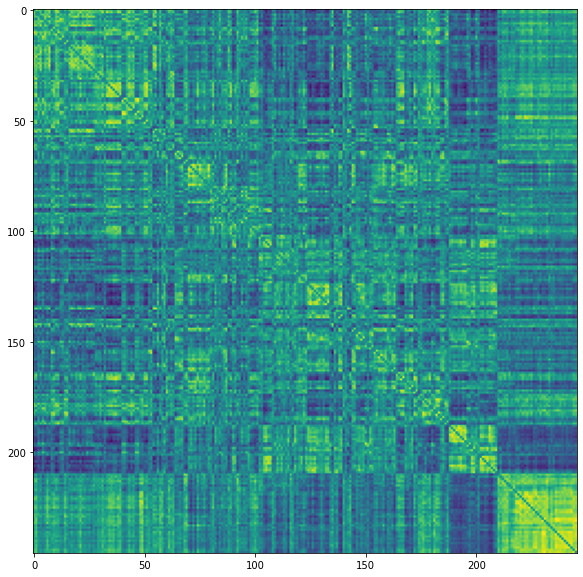

In [81]:
# Calculate the correlation matrix
A = np.corrcoef(roi_time_series_data)

# Remove self-links by setting the diagonal to 0 (i.e., no self-correlation)
np.fill_diagonal(A, 0)


#visualize_adjacency_matrix(A, 100) I didn't use this command, that also works fine, 
#because I wanted to visualize the matrix bigger

plt.figure(figsize=(10, 10))
plt.imshow(A) #, cmap='coolwarm', aspect='auto')
plt.show()

# b) Adjacency matrices at different densities

**Write** a function (`threshold_adjacency_matrix()` below) for thresholding the adjacency matrix to a given density. **Visualize** the adjacency matrix at densities 1%, 5%, 10%, 20% and 50%. While thresholding, set the links weaker than the threshold to 0 but keep the weights of the links stronger than the threshold.

In [70]:
def threshold_adjacency_matrix(A, density):
    """
    Thresholds the full adjacency matrix to a given network density.
    
    Parameters:
    -----------
    A: np.array, adjacency matrix
    density: int, density of the network; must belong to [0, 100] (0: no links, 100: full network)
    
    Returns:
    --------
    A_thresholded: np.array, the thresholded adjacency matrix
    """
    if density < 0 or density > 100:
        raise ValueError("Density must be in the range [0, 100].")
    
    # Calculate the threshold value based on the density percentage
    threshold_percentage = density / 100.0
    threshold_value = np.percentile(A, 100 * (1 - threshold_percentage))
    
    # Threshold the adjacency matrix to set weaker links to 0
    A_thresholded = np.where(A >= threshold_value, A, 0)
    
    return A_thresholded

By using the inverse density percentage as the percentile value, it finds a threshold that keeps the top weights to match the desired density, filtering out the bottom 1-density percentage of weights.

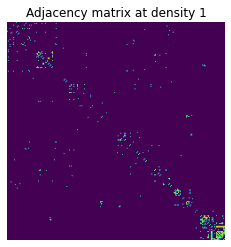

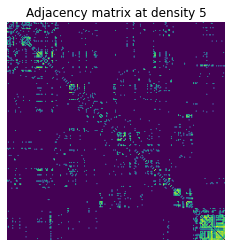

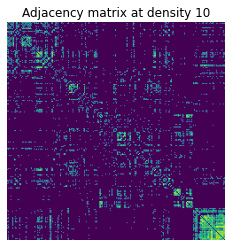

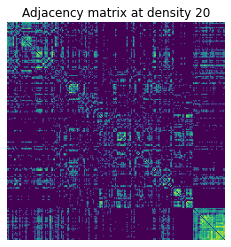

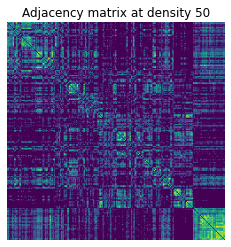

In [82]:
densities = [1, 5, 10, 20, 50] # density in %
for density in densities:
    A_thresholded = threshold_adjacency_matrix(A, density)
    #save_path = "adjacency_matrix_density_{}.pdf".format(density)
    visualize_adjacency_matrix(A_thresholded, density)

# c) Small-worldness at different densities

Small-worldness is often considered as an important property of brain networks: the balance between high clustering of regular networks and short path lengths of random networks supposedly optimally combines local processing and global efficiency (however, see e.g. Papo et al. 2016, Frontiers in Human Neuroscience 10 for a critical opinion). The small-worldness coefficient $\sigma$ is defined as
$$
\sigma = \frac{C/C_r}{L/L_r},
$$
where $C$ is the average clustering coefficient and $L$ the average shortest path length of the network and $C_r$ and $L_r$ are the corresponding properties of a random network with the same density. A network is typically considered as small-world if $\sigma > 1$.

**Threshold** the adjacency matrix to 10 densities ranging from 1% to 100%. At each density, **calculate** $C$, $C_r$, $L$, $L_r$, and $\sigma$. **Visualize** your results as 3 plots: i) $C$ and $C_r$ as a function of density, ii) $L$ and $L_r$ as a function of density, iii) $\sigma$ as a function of density.

Use the non-weighted versions of the functions for calculating $C$ and $L$. Alternatively, you can set the weight of all super-threshold links to 1.

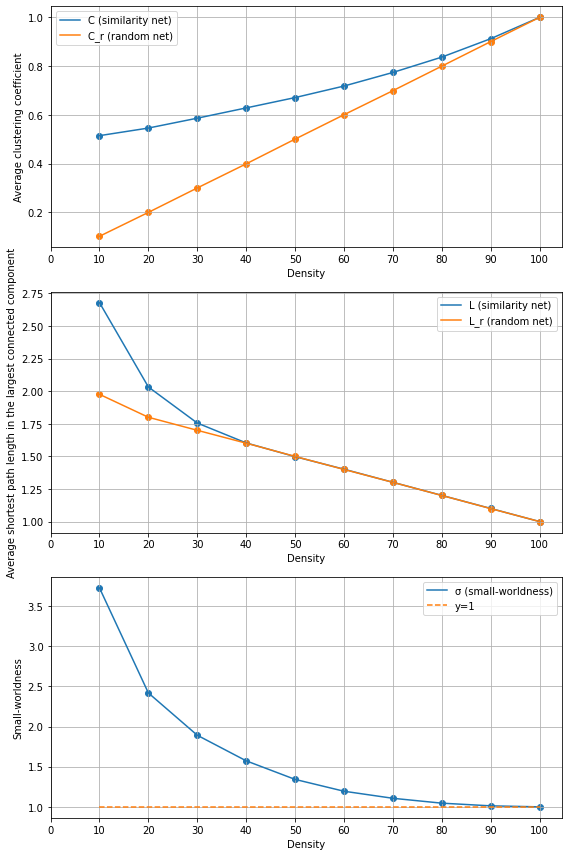

In [89]:
# Define the densities and number of random networks
densities = np.arange(10, 110, 10)
n_random_networks = 10
small_worldness = np.zeros(len(densities))
clusterings = np.zeros(len(densities))
random_clusterings = np.zeros(len(densities))
shortest_paths = np.zeros(len(densities))
random_shortest_paths = np.zeros(len(densities))

for i, density in enumerate(densities):
    A_thresholded = threshold_adjacency_matrix(A, density)
    
    # Calculate average clustering coefficient (C)
    G = nx.from_numpy_array(A_thresholded)
    if not nx.is_empty(G):
        clustering_coefficient = nx.average_clustering(G)
        clusterings[i] = clustering_coefficient
    else:
        # If the network is not connected, calculate C for the largest connected component
        components = list(nx.connected_components(G))
        largest_component = max(components, key=len)
        subgraph = G.subgraph(largest_component)
        clusterings[i] = nx.average_clustering(subgraph)

    # Calculate average shortest path length (L)
    if nx.is_connected(G):
        shortest_path_length = nx.average_shortest_path_length(G)
        shortest_paths[i] = shortest_path_length
    else:
        # If the network is not connected, calculate L for the largest connected component
        components = list(nx.connected_components(G))
        largest_component = max(components, key=len)
        subgraph = G.subgraph(largest_component)
        
        shortest_paths[i] = nx.average_shortest_path_length(subgraph)
    
    # Calculate C_r and L_r for n_random_networks random networks
    random_clusterings_per_density = np.zeros(n_random_networks)
    random_shortest_paths_per_density = np.zeros(n_random_networks)
    
    for j in range(n_random_networks):
        random_network = nx.fast_gnp_random_graph(G.number_of_nodes(), density / 100.0)
        
        if nx.is_connected(random_network):
            random_clusterings_per_density[j] = nx.average_clustering(random_network)
            random_shortest_paths_per_density[j] = nx.average_shortest_path_length(random_network)
        else:
            # If the random network is not connected, calculate C_r and L_r for the largest connected component
            random_components = list(nx.connected_components(random_network))
            random_largest_component = max(random_components, key=len)
            random_subgraph = random_network.subgraph(random_largest_component)
            random_clusterings_per_density[j] = nx.average_clustering(random_subgraph)
            random_shortest_paths_per_density[j] = nx.average_shortest_path_length(random_subgraph)

    # Calculate the average C_r and L_r
    random_clusterings[i] = np.mean(random_clusterings_per_density)
    random_shortest_paths[i] = np.mean(random_shortest_paths_per_density)

    # Calculate small-worldness coefficient (σ)
    sigma = (clusterings[i] / random_clusterings[i]) / (shortest_paths[i] / random_shortest_paths[i])
    small_worldness[i] = sigma

# Plotting the results
xticks = np.arange(0, 110, 10)

fig, ax = plt.subplots(3, 1, figsize=(8, 12))
ax[0].plot(densities, clusterings, label='C (similarity net)')
ax[0].plot(densities, random_clusterings, label=' $C_r$ (random net)')
ax[0].scatter(densities, clusterings)
ax[0].scatter(densities, random_clusterings)
ax[0].set_xlabel('Density')
ax[0].set_ylabel('Average clustering coefficient')
ax[0].legend()
ax[0].set_xticks(xticks) 
ax[0].grid(True)

ax[1].plot(densities, shortest_paths, label='L (similarity net)')
ax[1].plot(densities, random_shortest_paths, label=' $L_r$ (random net)')
ax[1].scatter(densities, shortest_paths)
ax[1].scatter(densities, random_shortest_paths)
ax[1].set_xlabel('Density')
ax[1].set_ylabel('Average shortest path length in \n the largest connected component')
ax[1].legend()
ax[1].set_xticks(xticks) 
ax[1].grid(True)

ax[2].plot(densities, small_worldness, label='σ (small-worldness)')
ax[2].plot(densities, np.ones(len(densities)), ls='--', label='y=1')
ax[2].scatter(densities, small_worldness)
ax[2].set_xlabel('Density')
ax[2].set_ylabel('Small-worldness')
ax[2].legend()
ax[2].set_xticks(xticks) 
ax[2].grid(True)

plt.tight_layout()
plt.show()